In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [653]:
data=pd.read_csv("./churn/cell2celltrain.csv")
data=data.drop(["CustomerID","ServiceArea"],axis=1)

In [654]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [655]:
data.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'Adjus

Extracting rating from credit rating column

In [656]:
data.isna().sum(axis=0)

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2                       909
ChildrenIn

In [657]:
data.loc[data.HandsetPrice=="Unknown","HandsetPrice"]=np.nan

In [658]:
data['HandsetPrice']

0         30
1         30
2        NaN
3         10
4         10
        ... 
51042     60
51043     60
51044     80
51045     30
51046     60
Name: HandsetPrice, Length: 51047, dtype: object

In [659]:
data['HandsetPrice'].fillna(data['HandsetPrice'].astype(float).mean(),inplace=True)

In [660]:
data.shape

(51047, 56)

In [661]:
data=data.fillna(data.mean())
data.dropna(inplace=True)

In [662]:
data.isna().sum(axis=0)

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

In [663]:
data.shape

(51047, 56)

In [664]:
data.CreditRating=data.CreditRating.str.split("-",n=1,expand=True)[0]

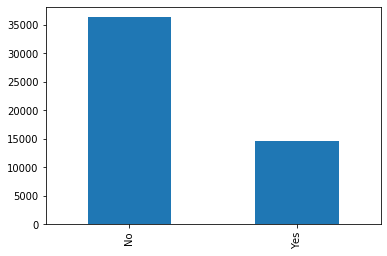

In [665]:
data['Churn'].value_counts().plot(kind='bar')

Unknown    19700
Yes        18651
No         12696
Name: MaritalStatus, dtype: int64


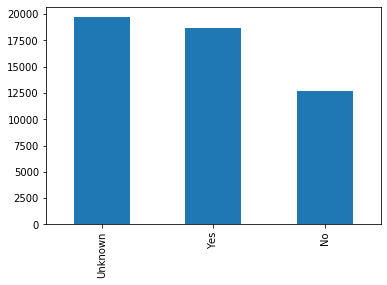

In [666]:
print(data['MaritalStatus'].value_counts())
data['MaritalStatus'].value_counts().plot(kind='bar')

In [667]:
data.loc[data['MaritalStatus']=='Unknown','Churn'].value_counts()

No     13753
Yes     5947
Name: Churn, dtype: int64

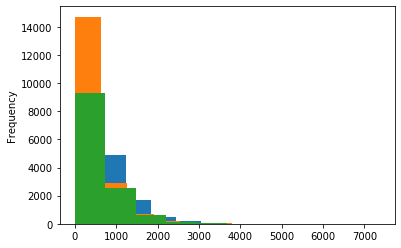

In [668]:
data.loc[data['MaritalStatus']=='Unknown','MonthlyMinutes'].plot(kind='hist')
data.loc[data['MaritalStatus']=='Yes','MonthlyMinutes'].plot(kind='hist')
data.loc[data['MaritalStatus']=='No','MonthlyMinutes'].plot(kind='hist')

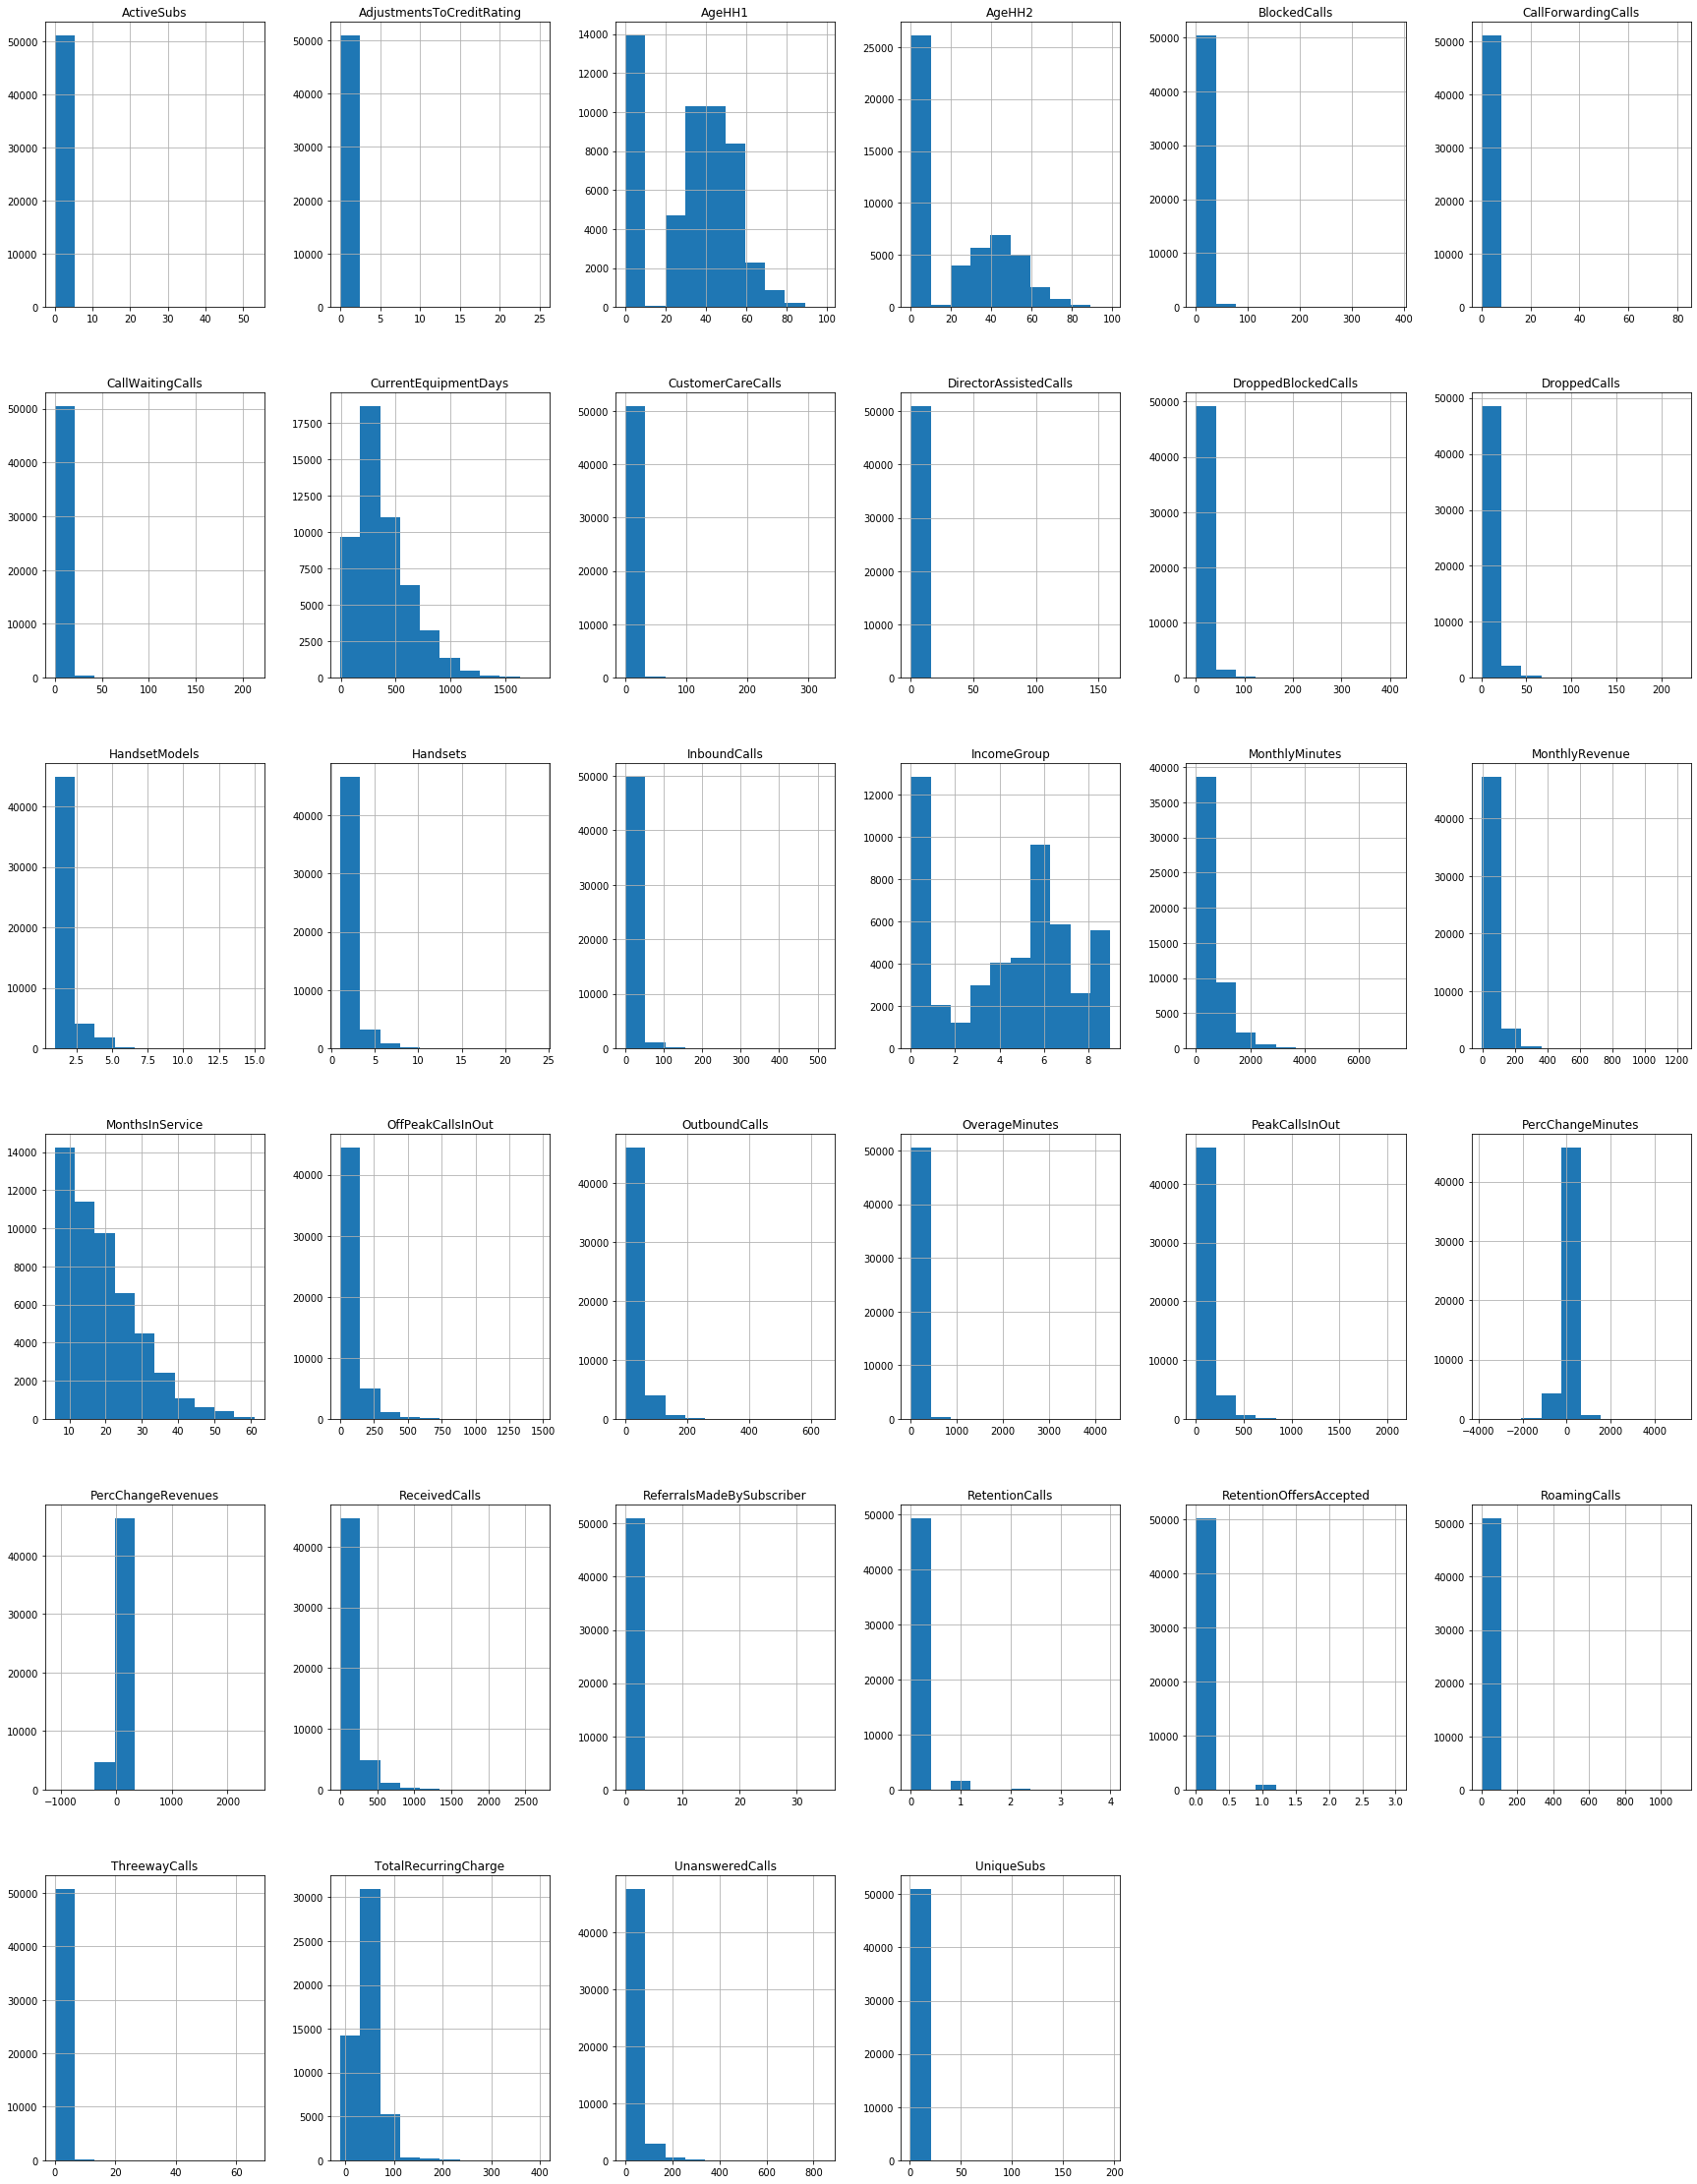

In [669]:
data.hist(figsize=[30,40])
plt.show()

Label Encoding and Dummies

In [670]:
lb=LabelEncoder()
data.Churn=lb.fit_transform(data.Churn)
#data.ServiceArea=lb.fit_transform(data.ServiceArea)
data.ChildrenInHH=lb.fit_transform(data.ChildrenInHH)
data.HandsetRefurbished=lb.fit_transform(data.HandsetRefurbished)
data.HandsetWebCapable=lb.fit_transform(data.HandsetWebCapable)
data.TruckOwner=lb.fit_transform(data.TruckOwner)
data.RVOwner=lb.fit_transform(data.RVOwner)
data.Homeownership=lb.fit_transform(data.Homeownership)
data.BuysViaMailOrder=lb.fit_transform(data.BuysViaMailOrder)
data.RespondsToMailOffers=lb.fit_transform(data.RespondsToMailOffers)
data.OptOutMailings=lb.fit_transform(data.OptOutMailings)
data.NonUSTravel=lb.fit_transform(data.NonUSTravel)
data.OwnsComputer=lb.fit_transform(data.OwnsComputer)
data.HasCreditCard=lb.fit_transform(data.HasCreditCard)
data.NewCellphoneUser=lb.fit_transform(data.NewCellphoneUser)
data.NotNewCellphoneUser=lb.fit_transform(data.NotNewCellphoneUser)
data.OwnsMotorcycle=lb.fit_transform(data.OwnsMotorcycle)
data.MadeCallToRetentionTeam=lb.fit_transform(data.MadeCallToRetentionTeam)
#data.PrizmCode=lb.fit_transform(data.PrizmCode)
#data.Occupation=lb.fit_transform(data.Occupation)
#data.MaritalStatus=lb.fit_transform(data.MaritalStatus)
#data=data.join(pd.get_dummies(data.ServiceArea,drop_first=True))
data=data.join(pd.get_dummies(data.PrizmCode,drop_first=True))
data=data.join(pd.get_dummies(data.Occupation,drop_first=True))
data=data.join(pd.get_dummies(data.MaritalStatus,drop_first=True))

In [671]:
data.shape

(51047, 68)

In [672]:
naan=data.isna().sum(axis=1)

data.dropna(axis=1,inplace=True)

In [673]:
data.shape

(51047, 68)

In [674]:
y=data.Churn.values
#x=data.drop(["Churn",'ServiceArea','PrizmCode','Occupation','MaritalStatus'],axis=1).values

x=data.drop(["Churn",'PrizmCode','Occupation','MaritalStatus'],axis=1).values

Scaling for PCA

In [675]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [710]:
pca=PCA(n_components=7)

In [711]:
x.shape

(51047, 64)

In [712]:
x_after=pca.fit_transform(x)

In [713]:
x_after.shape

(51047, 7)

Using random over sampler

In [714]:
oversampled_x,oversampled_y=RandomOverSampler(random_state=0).fit_resample(x_after,y)
undersampled_x,undersampled_y=RandomUnderSampler(random_state=42).fit_resample(x_after,y)

Splitting into train and test

In [715]:
xtrain,xtest,ytrain,ytest=train_test_split(x_after,y,test_size=0.2,random_state=0)
overx,overxt,overy,overyt=train_test_split(oversampled_x,oversampled_y,test_size=0.2,random_state=23)
underx,underxt,undery,underyt=train_test_split(undersampled_x,undersampled_y,test_size=0.2,random_state=12)

Logisitc Regression

In [716]:
lr=LogisticRegression()
overlr=LogisticRegression()
underlr=LogisticRegression()

In [717]:
lr.fit(xtrain,ytrain)
lr_pred=lr.predict(xtest)

In [718]:
overlr.fit(overx,overy)
overlr_pred=overlr.predict(overxt)

In [719]:
underlr.fit(underx,undery)
underlr_pred=underlr.predict(underxt)

In [720]:
lr.score(xtrain,ytrain)

0.7102137767220903

In [721]:
lr.score(xtest,ytest)

0.7160626836434868

In [722]:
overlr.score(overx,overy)

0.5571322909678862

In [723]:
overlr.score(overxt,overyt)

0.5624355005159959

In [724]:
underlr.score(underx,undery)

0.5580150401495517

In [725]:
underlr.score(underxt,underyt)

0.551911639762107

In [726]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      7327
           1       0.38      0.01      0.02      2883

    accuracy                           0.72     10210
   macro avg       0.55      0.50      0.43     10210
weighted avg       0.62      0.72      0.60     10210



In [727]:
recall_score(ytest,lr_pred)

0.008671522719389525

In [728]:
precision_score(ytest,lr_pred)

0.3787878787878788

In [729]:
f1_score(ytest,lr_pred)

0.0169548999660902

RandomForest

In [730]:
rf=RandomForestClassifier()
underf=RandomForestClassifier()
overf=RandomForestClassifier()

In [731]:
rf.fit(xtrain,ytrain)
rf_predict=rf.predict(xtest)

In [732]:
underf.fit(underx,undery)
underf_predict=rf.predict(underxt)

In [733]:
overf.fit(overx,overy)
overf_predict=rf.predict(overxt)

In [734]:
rf.score(xtrain,ytrain)

1.0

In [735]:
rf.score(xtest,ytest)

0.7095984329089128

In [736]:
overf.score(overx,overy)

1.0

In [737]:
overf.score(overxt,overyt)

0.8692122463020295

In [738]:
underf.score(underx,undery)

1.0

In [705]:
underf.score(underxt,underyt)

0.574001699235344

In [706]:
print(classification_report(ytest,rf_predict))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      7327
           1       0.48      0.03      0.06      2883

    accuracy                           0.72     10210
   macro avg       0.60      0.51      0.45     10210
weighted avg       0.65      0.72      0.61     10210



In [707]:
recall_score(ytest,rf_predict)

0.03156434269857787

In [708]:
precision_score(ytest,rf_predict)

0.4789473684210526

In [709]:
f1_score(ytest,rf_predict)

0.059225512528473814